# IMDB Prediction

Here we try to predict the IMDB Rating based on the episode descriptions

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from keras.models import Sequential
from keras import layers
import keras

2025-02-02 18:42:10.983982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738518130.999076   11913 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738518131.004315   11913 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-02 18:42:11.019118: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Import Description and IMDB Dataset

In [2]:
PATH_DESCRIPTIONS_CLEAN = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/topic_modeling/data/episodes_description.csv"
PATH_IMDB_RATINGS_CLEAN = "/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/data/episodes.json"


df_descriptions = pd.read_csv(PATH_DESCRIPTIONS_CLEAN)
df_imdb_ratings = pd.read_json(PATH_IMDB_RATINGS_CLEAN , orient="index")


### Add Ratings to episode description dataset

In [3]:
df_descriptions["rating"] = pd.Series(list(df_imdb_ratings["rating"]))
df = df_descriptions
df = df.dropna()
df

,Unnamed: 0,title,text,rating
0,0,Pilot,middle night obviously drunk rick bursts morty...,7.9
1,1,Lawnmower Dog,jerry complains family dog snuffles stupid r...,8.6
2,2,Anatomy Park (Episode),"christmas jerry tries enforce idea "" human hol...",8.3
3,3,M. Night Shaym-Aliens!,episode opens rick dissecting large rat garage...,8.6
4,4,Meeseeks and Destroy,mr meeseeks existing solve beth ’s problemafte...,9.0
...,...,...,...,...
66,66,Rickfending Your Mort,morty finds rick drunken stupor floor garage s...,7.8
67,67,Wet Kuat Amortican Summer,"rick ’s chores ( including cleaning another "" ...",6.4
68,68,Rise of the Numbericons: The Movie,"episode starts exact way post credits scene "" ...",4.5
69,69,Mort: Ragnarick,jerry white void golden light appear front nan...,7.9


### Create label for binary classification

In [4]:
df["evaluation"] = (df["rating"] > 8.2).astype(int)

/tmp/ipykernel_11913/694099369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["evaluation"] = (df["rating"] > 8.2).astype(int)


### Label Distribution

In [5]:
df["evaluation"].value_counts()

evaluation
1    36
0    35
Name: count, dtype: int64

### Train Test Val Split

In [6]:
train, test = np.split(df.sample(frac=1), [int(0.8*len(df))])
train

/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,Unnamed: 0,title,text,rating,evaluation
25,25,The Whirly Dirly Conspiracy,episode begins jerry wallowing lonely new life...,8.4,1
48,48,Rickternal Friendshine of the Spotless Mort,leaving trip smiths leave rick home alone leav...,8.2,0
50,50,Rickmurai Jack,"rick fully immersed "" rick two crows "" show ...",9.3,1
31,31,Edge of Tomorty: Rick Die Rickpeat,morty ’s ideal death jessica old age.the smith...,8.9,1
62,62,The Jerrick Trap,rick fixing flying saucer garage jerry comes a...,7.3,0
17,17,Big Trouble in Little Sanchez,eating breakfast jerry asks children summer mo...,8.4,1
55,55,Final DeSmithation,smith family dining panda express discuss next...,8.2,0
64,64,That's Amorte,morty holding spaghetti.the smith family enjoy...,8.3,1
42,42,Mortyplicity,rick family eating rick tells family god real ...,8.7,1
20,20,The Wedding Squanchers,rick morty beth summer jerry eating breakfas...,9.3,1


In [7]:
test

,Unnamed: 0,title,text,rating,evaluation
2,2,Anatomy Park (Episode),"christmas jerry tries enforce idea "" human hol...",8.3,1
46,46,Rick & Morty's Thanksploitation Spectacular,thanksgiving rick morty break government build...,7.1,0
36,36,Never Ricking Morty,train zooming space bearded man enters dining ...,8.0,0
47,47,Gotron Jerrysis Rickvangelion,rick summer morty way boob world rick notice...,6.3,0
54,54,Night Family,beth trouble falling asleep due jerry ’s sno...,8.5,1
69,69,Mort: Ragnarick,jerry white void golden light appear front nan...,7.9,0
51,51,Solaricks,getting stranded remains citadel events previo...,8.5,1
43,43,A Rickconvenient Mort,buying custom shirts rick morty assaulted acid...,7.8,0
66,66,Rickfending Your Mort,morty finds rick drunken stupor floor garage s...,7.8,0
12,12,Mortynight Run,rick teaching morty drive space cruiser talks ...,8.8,1


In [8]:
test["evaluation"].value_counts()

evaluation
0    8
1    7
Name: count, dtype: int64

### Create Features and Label for Binary Classification and for Regression

In [10]:
X_train = train["text"]
X_test = test["text"]

Y_train = train["evaluation"]
Y_test = test["evaluation"]

Y_train_reg = train["rating"] 
Y_test_reg = test["rating"] 


print(Y_test_reg)

2     8.3
46    7.1
36    8.0
47    6.3
54    8.5
69    7.9
51    8.5
43    7.8
66    7.8
12    8.8
13    8.5
1     8.6
68    4.5
23    9.3
30    8.2
Name: rating, dtype: float64


### Spacy Pipeline


In [11]:
import spacy
from spacy.language import Language
from spacy.tokens import Doc

In [12]:
nlp = spacy.load("en_core_web_sm")


### Remove Lemmatizer to not confuse the model

In [13]:
nlp.pipeline
nlp.remove_pipe("lemmatizer")

('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7fbed1a7dfc0>)

### Add Component to lower Doc and Return String

In [1]:
@Language.component("to_lower")
def custom_to_lower(doc) -> list[str]:
    valid_doc = [token.text.lower()  for token in doc]
    valid_doc_pos = [token.pos_   for token in doc ]

    #return Doc(nlp.vocab , words=valid_doc , pos=valid_doc_pos)
    return valid_doc

NameError: name 'Language' is not defined

In [15]:
nlp.add_pipe("to_lower", after="ner")


<function __main__.custom_to_lower(doc)>

In [16]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7fbed1c8da20>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7fbed1c8e620>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7fbe102f00b0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7fbed1a773c0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fbe0fced7e0>),
 ('to_lower', <function __main__.custom_to_lower(doc)>)]

### Method to tokenize a whole Series of Strings to List of STrings

In [17]:
def tokenize_list( input_list : pd.Series) -> list:
    return list(nlp.pipe(input_list))
    

In [ ]:
# def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
#   df = dataframe.copy()
#   labels = df.pop('evaluation')
#   df = df["text"]
#   ds = tf.data.Dataset.from_tensor_slices((df, labels))
#   if shuffle:
#     ds = ds.shuffle(buffer_size=len(dataframe))
#   ds = ds.batch(batch_size)
#   ds = ds.prefetch(tf.data.AUTOTUNE)
#   return ds

In [ ]:
# train_data = df_to_dataset(train)
# valid_data = df_to_dataset(val)
# test_data = df_to_dataset(test)
# train_data

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()
# vectorizer.fit(train["text"])

# X_train = vectorizer.transform(train["text"])
# X_test  = vectorizer.transform(test["text"])
# Y_train = train["evaluation"]
# Y_valid = val["evaluation"]
# Y_test = test["evaluation"]

In [ ]:
# # label encode the target variable 
# encoder = preprocessing.LabelEncoder()
# train_y = encoder.fit_transform(train_y)
# valid_y = encoder.fit_transform(valid_y)

## Word2Vec embedding Model

### Corpus for all tokens in each text

In [18]:
corpus = tokenize_list(df["text"])
corpus = [x for x in corpus]

In [19]:
corpus[1]

['  ',
 'jerry',
 'complains',
 'family',
 'dog',
 'snuffles',
 'stupid',
 'rick',
 'gives',
 'jerry',
 'device',
 'enhances',
 'dog',
 '’s',
 'intelligence',
 'morty',
 'go',
 'dreams',
 'morty',
 '’s',
 'math',
 'teacher',
 'persuade',
 'give',
 'morty',
 '"',
 '"',
 'class',
 'morty',
 'assigned',
 'less',
 'homework',
 'go',
 'morty',
 '’s',
 'math',
 'teacher',
 '’s',
 'dreams',
 'dreams',
 'strong',
 'black',
 'female',
 'tv',
 'character',
 'named',
 'mrs',
 'pancakes',
 'centaur',
 '’s',
 'dreams',
 'results',
 'rick',
 'morty',
 'eventually',
 'encountering',
 'scary',
 'terry',
 '(',
 'parody',
 'freddy',
 'krueger',
 'villain',
 'ina',
 'nightmare',
 'elm',
 'street',
 ')',
 'scary',
 'terry',
 'begins',
 'chasing',
 'two',
 'multiple',
 'dreams',
 'causing',
 'rick',
 'become',
 'unhinged.at',
 'one',
 'point',
 'two',
 'come',
 'across',
 'dream',
 'post',
 'apocalyptic',
 'city',
 'decide',
 'hide',
 'scary',
 'terry',
 'gets',
 'tired',
 'scary',
 'terry',
 'eventually',

### Create Word2Vec Model with All Data

In [20]:
import gensim
w2v_model = gensim.models.Word2Vec(corpus, min_count=2,
                                 vector_size=100, window=5)

### Print All Keys of Model to verify Results

In [21]:
print(list(w2v_model.wv.key_to_index.keys()))

['rick', 'morty', '’s', '"', 'jerry', 'beth', 'summer', 'family', 'back', 'time', '(', 'one', 'two', ')', 'get', 'tells', 'however', 'mr', 'planet', 'president', 'asks', 'portal', 'tries', 'go', 'space', 'earth', 'like', 'kill', '’', 'reveals', 'home', 'room', 'find', 'make', 'another', 'ship', 'take', 'people', 'would', 'new', ':', 'away', 'using', 'scene', 'leave', 'garage', 'gets', 'help', 'gun', ';', 'smith', 'begins', 'explains', 'man', 'quickly', 'still', 'dimension', 'goes', 'killing', 'life', 'leaves', 'takes', 'alien', 'snake', 'prime', 'upon', 'way', 'house', 'post', 'world', 'first', 'fight', 'episode', 'ricks', 'attempts', 'going', 'death', 'decides', 'memory', 'head', 'leaving', 'body', 'turns', 'causing', 'finds', 'killed', 'water', 'credits', 'escape', 'hole', 'says', 'gives', 'return', 'also', 'birdperson', 'use', 'jessica', 'car', 'left', 'together', 'finally', 'wants', 'day', 'device', 'mind', 'around', 'work', 'arrives', 'eventually', 'free', 'getting', 'school', 'ev

### Tesing

In [22]:
print(w2v_model.wv.similarity('birdperson', 'space'))

0.99966884


In [23]:
print(w2v_model.wv["rick"])

[-1.3901656   0.6646658   0.35159516  0.20530516  0.46706048 -1.7496862
  0.63124937  2.4779444  -1.2586167  -0.6560824  -0.69865185 -2.1452732
 -0.0739335   0.41195986  0.26448828 -1.0356238   0.3261116  -0.85523146
 -0.2963112  -2.3211856   0.79237545  0.40196407  1.5717281  -0.13825826
  0.3431664  -0.200879   -1.1764767   0.31237382 -0.8853     -0.10047723
  0.9564295   0.21869902 -0.0443087  -0.9270702   0.00421625  1.4113041
  0.4533495  -0.78214127 -0.61024815 -1.6140071  -0.06081709 -1.2345163
 -0.80638486  0.12130055  0.99248964 -0.21305159 -1.2674055   0.13639513
  0.33318475  0.99245936  0.6998492  -0.7437017  -0.99273926 -0.43952698
 -1.0912257   0.30019405  1.0822237  -0.9269657  -1.0273209   0.2542156
  0.13287973  0.56682754 -0.04369204 -0.39062488 -1.3206253   0.62937856
  0.3278912   0.73068726 -0.9813473   1.038835   -0.93508583  0.3588823
  1.0119911  -0.47771648  1.3829687   0.42189515  0.12632827 -0.02405812
 -0.4331453   0.5317865  -0.80752504  0.12328637 -0.44062

### Method to Calculate Average Vector for a tokenized sentence

In [24]:
def calculate_average_vector(array , model):
    counter = 0
    vector = np.zeros(shape=(100,))
    for doc in array:
        try:
            vector += np.array(model.wv[doc])
            counter +=1
        except:
            continue
    return vector / counter


## Normal Neural Network Classification

In [25]:
from keras.layers import Dense

In [26]:
model = Sequential()
model.add(Dense(100, input_shape=(100,) , activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-02 18:43:05.259412: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

### Embedd All Train Descriptions 

In [28]:
embedded_x_train : list = []


for x_data in X_train:
    corpus = tokenize_list([x_data])
    corpus = [str(x) for x in corpus]
    embedded_x_train.append(calculate_average_vector(corpus[0] , w2v_model))

embedded_x_train

[array([-0.09109643,  0.04323822,  0.02643044,  0.01189948,  0.02894796,
        -0.12245429,  0.04320891,  0.16530359, -0.08673554, -0.04304315,
        -0.04884223, -0.14258315, -0.00192952,  0.02128049,  0.01974291,
        -0.07049773,  0.02519575, -0.06061091, -0.02377195, -0.16086881,
         0.05670846,  0.02813129,  0.10066571, -0.00801497,  0.0281927 ,
        -0.0181451 , -0.08038512,  0.01616854, -0.05670742, -0.01079282,
         0.06115884,  0.01984884, -0.00583252, -0.06464175,  0.00185937,
         0.0925336 ,  0.03635298, -0.05069189, -0.04166616, -0.10506631,
        -0.00429003, -0.08315778, -0.05111541,  0.01110467,  0.06098442,
        -0.01708901, -0.08449742,  0.0075251 ,  0.02076959,  0.06272793,
         0.04778179, -0.0523405 , -0.06633504, -0.02333482, -0.07380164,
         0.01845724,  0.06565422, -0.05786294, -0.06907889,  0.01297857,
         0.00789499,  0.037985  , -0.00052366, -0.02111691, -0.08922669,
         0.04093917,  0.02440893,  0.04311259, -0.0

### Fit Model

In [29]:
model.fit(np.array(embedded_x_train), np.array(Y_train), epochs=150, batch_size=10)

Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4944 - loss: 0.6941
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4998 - loss: 0.6930 
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5862 - loss: 0.6905 
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5463 - loss: 0.6924 
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4940 - loss: 0.6920 
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4852 - loss: 0.6928 
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4369 - loss: 0.6938 
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5588 - loss: 0.6896 
Epoch 9/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5715 - loss: 0.6901 
Epoch 10/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5151 - loss: 0.6908 
Epoch 11/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5781 - loss: 0.6881 
Epoch 12/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5453 - loss

### Function that predicts Evaluation by String

In [30]:
def test_string_model(input_str , model , emb_model):
    docs = tokenize_list([input_str])[0]
    print(docs)
    counter = 0
    vector = np.zeros(shape=(100,))
    avrg_vector = np.zeros(shape=(100,))
    for doc in docs:
        try:
            vector += np.array(emb_model.wv[doc])
            counter +=1

        except:
            continue

    avrg_vector = vector / counter
    
    vector_with_batch = np.expand_dims(avrg_vector, axis=0)
    
    return model.predict(vector_with_batch)
    


### test Function

In [31]:
test_string_model("pickle rick is president of the planet" , model , w2v_model)

['pickle', 'rick', 'is', 'president', 'of', 'the', 'planet']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.00836973]], dtype=float32)

In [2]:
embedded_x_test : list = []

for x_data in X_test:
    corpus = tokenize_list([x_data])
    corpus = [str(x) for x in corpus]
    embedded_x_test.append(calculate_average_vector(corpus[0] , w2v_model))

embedded_x_test

NameError: name 'X_test' is not defined

### Perform CV

In [ ]:
from sklearn.model_selection import KFold
X = df["text"]
Y = df["evaluation"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross Validation
val_scores = []
epochs = 10


for train_idx, val_idx in kf.split(X):
    # Daten aufteilen
    x_train, x_val = X[train_idx], X[val_idx]
    y_train, y_val = Y[train_idx], Y[val_idx]
    epochs += 25    

    model = Sequential()
    model.add(Dense(100, input_shape=(100,) , activation='relu'))
    model.add(Dense(70, activation='relu'))
    model.add(Dense(70, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


    embedded_x_train_cv = []
    for x_data in x_train:
        corpus = tokenize_list([x_data])
        corpus = [str(x) for x in corpus]
        embedded_x_train_cv.append(calculate_average_vector(corpus[0] , w2v_model))
    
    embedded_x_val_cv = []
    for x_data in x_val:
        corpus = tokenize_list([x_data])
        corpus = [str(x) for x in corpus]
        embedded_x_val_cv.append(calculate_average_vector(corpus[0] , w2v_model))
    
    # Trainieren
    model.fit(np.array(embedded_x_train_cv), np.array(y_train).reshape(-1, 1), epochs=epochs, batch_size=10, verbose=0)

    # Evaluieren
    val_loss, val_acc = model.evaluate(np.array(embedded_x_val_cv), np.array(y_val).reshape(-1, 1), verbose=0)
    print("Hello")
    val_scores.append(val_acc)

print(f"Durchschnittliche Validierungsgenauigkeit: {np.mean(val_scores):.4f}")


In [33]:
val_scores

NameError: name 'val_scores' is not defined

In [34]:
model.evaluate(np.array(embedded_x_test), np.array(Y_test), return_dict=True )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3333 - loss: 0.7886


{'accuracy': 0.3333333432674408, 'loss': 0.7886266112327576}

### Plot Results

In [35]:
result_tests = []
temp_x_test_vec = np.zeros(shape=(100,))
for temp_x_test in embedded_x_test:
    
    temp_x_test_vec = np.expand_dims(temp_x_test, axis=0)
    result_tests.append(model.predict(np.array(temp_x_test_vec))[0][0])

result_tests

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


[0.4163354,
 0.6499717,
 0.30624458,
 0.6138649,
 0.51426387,
 0.6109549,
 0.46247715,
 0.5991555,
 0.56107104,
 0.4022753,
 0.4040333,
 0.40100047,
 0.41522914,
 0.55704135,
 0.45991752]

In [ ]:
Y_test

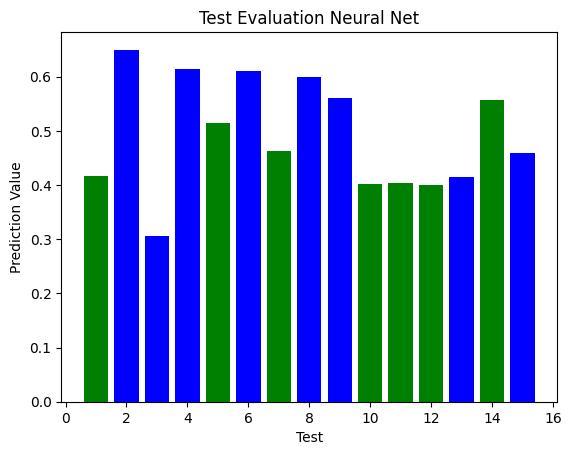

In [40]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.array(range(len(result_tests))) + 1

colors = ["green" if y==1 else "blue" for y in Y_test] # Green = Good Episode

plt.bar(x_axis, result_tests , color=colors)
#plt.ylim(0.50, 0.56)
plt.title('Test Evaluation Neural Net')
plt.xlabel('Test')
plt.ylabel('Prediction Value')
plt.show()

In [38]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 100.4 kB/s eta 0:00:0031m95.8 kB/s eta 0:00:01


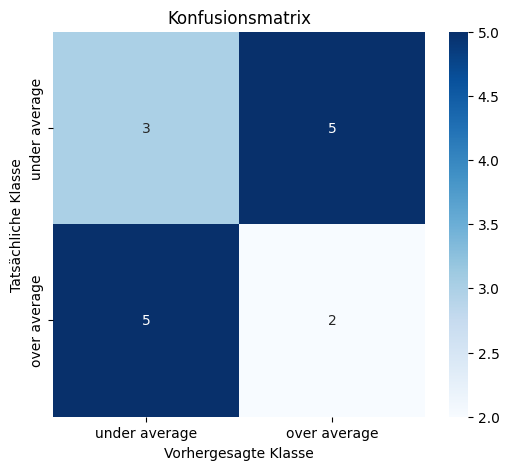

[[3 5]
 [5 2]]


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Beispiel: Wahre Labels und vorhergesagte Labels
y_true = Y_test
y_pred = np.array( [ 1 if x > 0.5 else 0  for x in result_tests]  )

# Konfusionsmatrix berechnen
cm = confusion_matrix(y_true, y_pred)

# Anzeige der Konfusionsmatrix mit seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=["under average","over average"], yticklabels=["under average","over average"])
plt.xlabel("Vorhergesagte Klasse")
plt.ylabel("Tatsächliche Klasse")
plt.title("Konfusionsmatrix")
plt.show()
print(cm)


## LSTM Model Classification

### Size of Embedding Vector in w2vmodel

In [43]:
EMBEDDING_DIM = 100

### Embedd a whole sentence function

In [45]:
MAX_LENGTH = 500
def sentence_to_embedding(sentence , embedding_model):
    temp_embedding_matrix = np.zeros((MAX_LENGTH, EMBEDDING_DIM))  # Leere Matrix für Embeddings
    for i, word in enumerate(sentence[:MAX_LENGTH]):  # Maximal 5 Wörter
        if word in embedding_model.wv:
            temp_embedding_matrix[i] = embedding_model.wv[word]  # Wortvektor einfügen
    return temp_embedding_matrix

### Prepare Test and Train Data

In [46]:
X_train_lstm = [sentence_to_embedding(x , w2v_model) for x in X_train ]
X_test_lstm = [sentence_to_embedding(x , w2v_model) for x in X_test ]


### LSTM Model Architecture

In [47]:

#embedding_vector_features=45

ltsm_model=Sequential()

ltsm_model.add(layers.Masking(mask_value=0.0, input_shape=(MAX_LENGTH, EMBEDDING_DIM)))
ltsm_model.add(layers.LSTM(128,activation='relu',return_sequences=False))
ltsm_model.add(layers.Dropout(0.2))
#ltsm_model.add(layers.Dense(70 , activation="sigmoid"))

ltsm_model.add(layers.Dense(1, activation="sigmoid"))


/home/anton/Anton/Studium/DHBW /Semester_5/Text_Analysis/repo/Burg-NLP/venv/lib/python3.10/site-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile Model

In [48]:
ltsm_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### Fit LSTM Model

In [49]:
ltsm_model.fit(np.array(X_train_lstm), np.array(Y_train).reshape(-1, 1), epochs=25, batch_size=10)

Epoch 1/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.5702 - loss: 0.6897
Epoch 2/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.5520 - loss: 0.6766
Epoch 3/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.4649 - loss: 0.6909
Epoch 4/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.4628 - loss: 0.6554
Epoch 5/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.4392 - loss: 0.6594
Epoch 6/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.5242 - loss: 0.6644
Epoch 7/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.6692 - loss: 0.6345
Epoch 8/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.5766 - loss: 0.6393
Epoch 9/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.6805 - loss: 0.6344
Epoch 10/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.5893 - loss: 0.6682
Epoch 11/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.6371 - loss: 0.6704
Epoch 12/25
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.6461 - lo

### Function to Predict by Sentence

In [3]:
def predict_sentence_ltsm(word2vec_model, sentence : str) -> float:
    """
    Funktion zur Vorhersage eines Satzes mit dem trainierten LSTM-Modell.
    """
    model = ltsm_model
    words = sentence.lower().split()  # Satz in Wörter umwandeln
    embedding_matrix = np.zeros((MAX_LENGTH, EMBEDDING_DIM))  # Leere Matrix für Embeddings
    
    for i, word in enumerate(words[:MAX_LENGTH]):  # Nur die ersten MAX_LENGTH Wörter nehmen
        word = word.lower()
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]  # Wortvektor einfügen

    # In 3D-Form bringen: (1, MAX_LENGTH, EMBEDDING_DIM)
    input_data = np.expand_dims(embedding_matrix, axis=0)
    
    # Vorhersage mit Modell
    prediction = model.predict(input_data)[0][0]  # Output ist eine 2D-Matrix, daher [0][0]
    
    # In "Positiv" oder "Negativ" umwandeln
    sentiment = "Positiv" if prediction > 0.5 else "Negativ"
    print(f"Satz: '{sentence}' → {sentiment} (Score: {prediction:.4f})")
    return prediction


### Test

In [51]:
predict_sentence_ltsm(w2v_model, str(df[(df["title"] == "The Ricks Must Be Crazy")]["text"]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Satz: '16    rick morty summer exit theater showcasing ball...
Name: text, dtype: object' → Negativ (Score: 0.3242)


0.3241957

### Plot Test Results

In [52]:
test_results_lstm_class = []

for title in test["title"]:
    test_results_lstm_class.append(predict_sentence_ltsm(w2v_model, str(df[(df["title"] == title)]["text"])))
for rating in test["evaluation"]:
    print(rating)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Satz: '2    christmas jerry tries enforce idea " human hol...
Name: text, dtype: object' → Negativ (Score: 0.3903)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Satz: '46    thanksgiving rick morty break government build...
Name: text, dtype: object' → Negativ (Score: 0.3743)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Satz: '36    train zooming space bearded man enters dining ...
Name: text, dtype: object' → Negativ (Score: 0.4820)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Satz: '47      rick summer morty way boob world rick notice...
Name: text, dtype: object' → Negativ (Score: 0.2469)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Satz: '54      beth trouble falling asleep due jerry ’s sno...
Name: text, dtype: object' → Negativ (Score: 0.3053)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Satz: '69    jerry white void golden light appear front nan...
Name: text, dtype: object' → Positiv (Score: 0.5121)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Satz: '51    getting stranded remains c

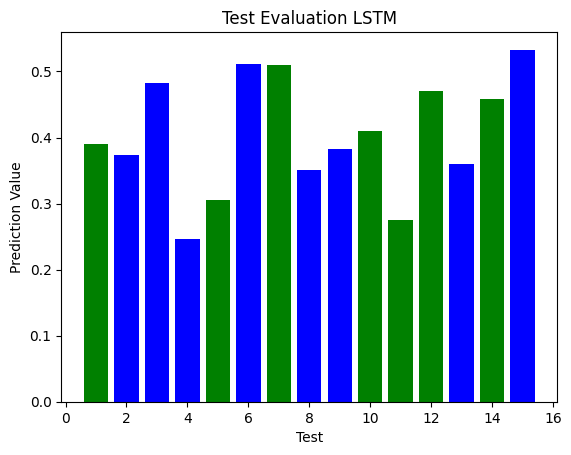

In [53]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.array(range(len(test_results_lstm_class))) + 1

colors = ["green" if y==1 else "blue" for y in Y_test] # Green = Good Episode

plt.bar(x_axis, test_results_lstm_class , color=colors)
plt.title('Test Evaluation LSTM')
plt.xlabel('Test')
plt.ylabel('Prediction Value')
plt.show()

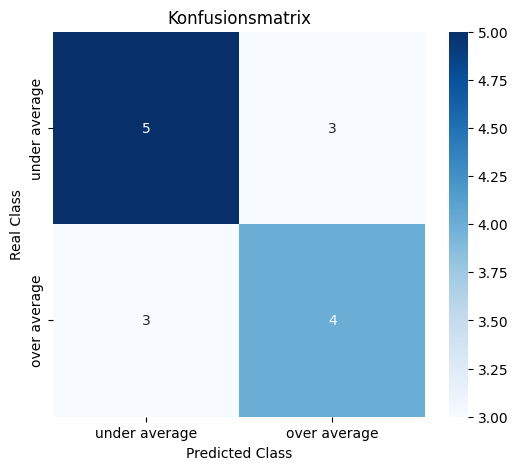

[[5 3]
 [3 4]]


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Beispiel: Wahre Labels und vorhergesagte Labels
y_true = Y_test
y_pred = np.array( [ 1 if x > 0.4 else 0  for x in test_results_lstm_class]  ) 

# Konfusionsmatrix berechnen
cm = confusion_matrix(y_true, y_pred)


# Anzeige der Konfusionsmatrix mit seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["under average","over average"], yticklabels=["under average","over average"])
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.title("Konfusionsmatrix")
plt.show()
print(cm)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.array(range(len(test_results_lstm_class))) + 1

plt.bar(x_axis, Y_test_reg )
plt.title('Test Evaluation LSTM')
plt.xlabel('Test')
plt.ylabel('Prediction Value')
plt.show()

## Regression with LSTM

### Create Embedding Matrix

In [114]:
VOCAB_SIZE = len(w2v_model.wv.key_to_index.keys()) + 1  # +1 für Padding-Token
EMBEDDING_DIM = 100
embedding_matrix = np.zeros((VOCAB_SIZE, EMBEDDING_DIM))

for word in w2v_model.wv.key_to_index:
    if word in w2v_model.wv:
        embedding_matrix[w2v_model.wv.key_to_index[word]] = w2v_model.wv[word]/ np.linalg.norm(w2v_model.wv[word])



### Model Architecture

In [116]:
X_train_lstm = [sentence_to_embedding(x , w2v_model) for x in X_train ]
print(len(X_train_lstm))

embedding_vector_features=45

ltsm_model_reg=Sequential()

ltsm_model_reg.add(layers.Masking(mask_value=0.0, input_shape=(MAX_LENGTH, EMBEDDING_DIM)))

ltsm_model_reg.add(layers.LSTM(128,activation='relu',return_sequences=False))

ltsm_model_reg.add(layers.Dropout(0.4))
ltsm_model_reg.add(layers.Dense(200, activation="relu"))
ltsm_model_reg.add(layers.Dense(60, activation="relu"))
ltsm_model_reg.add(layers.Dense(60, activation="relu"))
ltsm_model_reg.add(layers.Dense(1, activation=None))

# ltsm_model.add(layers.LSTM(128,activation='relu'))

# ltsm_model.add(layers.Dropout(0.2))

56


### Compile Model

In [117]:
ltsm_model_reg.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=1e-2), metrics=["mean_absolute_error"])

### Fit Model 

In [118]:
ltsm_model_reg.fit(np.array(X_train_lstm), np.array(Y_train_reg).reshape(-1, 1), epochs=40, batch_size=10)

Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 173ms/step - loss: 58983884.0000 - mean_absolute_error: 1229.6660
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 248.6067 - mean_absolute_error: 10.8159
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 65.8479 - mean_absolute_error: 8.0487
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - loss: 66.0200 - mean_absolute_error: 7.5056
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - loss: 52.0110 - mean_absolute_error: 6.9130
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - loss: 39.3161 - mean_absolute_error: 5.7747
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - loss: 32.8014 - mean_absolute_error: 5.1412
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - loss: 25.5427 - mean_absolute_error: 4.1729
Epoch 9/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - loss: 43.0430 - mean_absolute_error: 5.3089
Epoch 10/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 34.9383 - mean_absolute_error: 5.7109
Epoch 11/40
6/6 ━━━━━━━━━━━━

### Function to Predict Rating based on Sentence

In [119]:
def predict_sentence_ltsm_reg(word2vec_model, sentence):
    """
    Funktion zur Vorhersage eines Satzes mit dem trainierten LSTM-Modell.
    """
    model = ltsm_model_reg
    words = sentence.lower().split()  # Satz in Wörter umwandeln
    embedding_matrix = np.zeros((MAX_LENGTH, EMBEDDING_DIM))  # Leere Matrix für Embeddings
    
    for i, word in enumerate(words[:MAX_LENGTH]):  # Nur die ersten MAX_LENGTH Wörter nehmen
        word = word.lower()
        if word in word2vec_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]# Wortvektor einfügen

    # In 3D-Form bringen: (1, MAX_LENGTH, EMBEDDING_DIM)
    input_data = np.expand_dims(embedding_matrix, axis=0)
    
    # Vorhersage mit Modell
    prediction = model.predict(input_data)[0][0]  # Output ist eine 2D-Matrix, daher [0][0]
    
    # In "Positiv" oder "Negativ" umwandeln
    print(f"{prediction}")
    return prediction


In [120]:
test_results_lstm_reg = []

for title in test["title"]:
    test_results_lstm_reg.append((predict_sentence_ltsm_reg(w2v_model, str(df[(df["title"] == title)]["text"]))))
test_results_lstm_reg

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
8.324923515319824
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
12.514546394348145
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
8.55407428741455
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
8.275734901428223
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
8.520286560058594
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
8.439942359924316
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
8.671319007873535
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
11.516166687011719
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
7.952003002166748
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
7.2100324630737305
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
9.27102279663086
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
7.8818511962890625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
8.111624717712402
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
8.364991188049316
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
8.63337516784668


[8.3249235,
 12.514546,
 8.554074,
 8.275735,
 8.520287,
 8.439942,
 8.671319,
 11.516167,
 7.952003,
 7.2100325,
 9.271023,
 7.881851,
 8.111625,
 8.364991,
 8.633375]

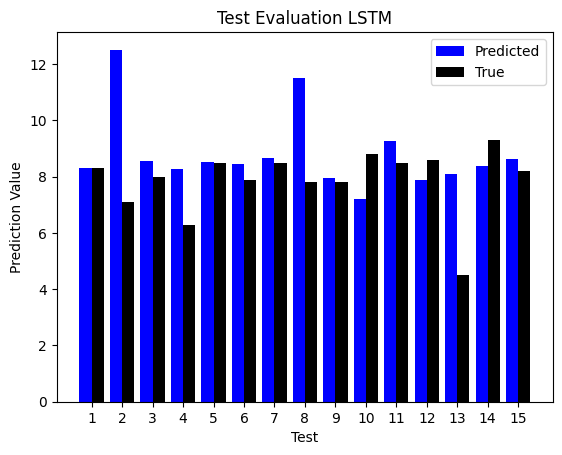

In [152]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.array(range(len(test_results_lstm_reg))) + 1
width = 0.4
plt.bar(x_axis - 0.2, test_results_lstm_reg , width=width , color="blue")
plt.bar(x_axis + 0.2 , Y_test_reg, width=width , color="black")
#plt.ylim(6,10)
plt.title('Test Evaluation LSTM')
plt.xticks(x_axis)
plt.xlabel('Test')
plt.ylabel('Prediction Value')
plt.legend(["Predicted" , "True"])
plt.show()

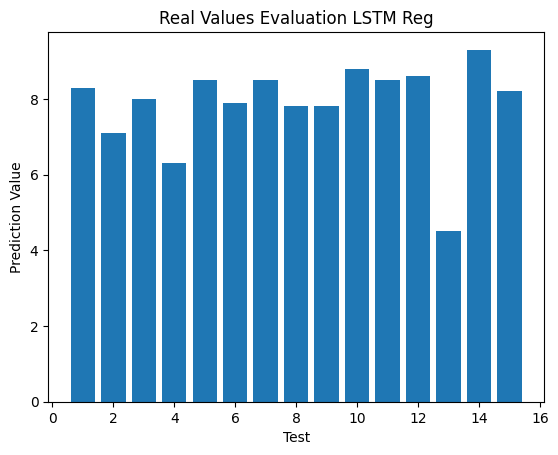

In [127]:
import matplotlib.pyplot as plt
import numpy as np

x_axis = np.array(range(len(test_results_lstm_class))) + 1

plt.bar(x_axis, Y_test_reg )
plt.title('Real Values Evaluation LSTM Reg')
plt.xlabel('Test')
plt.ylabel('Prediction Value')
plt.show()

### perform Cross Validation

Get Epochs

In [ ]:
from sklearn.model_selection import KFold
X = df["text"]
Y = df["evaluation"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross Validation
val_scores = []
epochs = 5


for train_idx, val_idx in kf.split(X):
    # Daten aufteilen
    x_train, x_val = X[train_idx], X[val_idx]
    y_train, y_val = Y[train_idx], Y[val_idx]
    epochs += 5    

    X_train_lstm = [sentence_to_embedding(x , w2v_model) for x in x_train ]
    X_val_lstm = [sentence_to_embedding(x , w2v_model) for x in x_val]
    
    embedding_vector_features=45
    
    ltsm_model_reg=Sequential()
    
    ltsm_model_reg.add(layers.Masking(mask_value=0.0, input_shape=(MAX_LENGTH, EMBEDDING_DIM)))
    
    ltsm_model_reg.add(layers.LSTM(128,activation='relu',return_sequences=False))
    
    ltsm_model_reg.add(layers.Dropout(0.4))
    ltsm_model_reg.add(layers.Dense(100, activation="relu"))
    ltsm_model_reg.add(layers.Dense(30, activation="relu"))
    ltsm_model_reg.add(layers.Dense(30, activation="relu"))
    ltsm_model_reg.add(layers.Dense(1, activation=None))


    ltsm_model_reg.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=1e-2), metrics=["mean_absolute_error"])


    # Trainieren
    ltsm_model_reg.fit(np.array(X_train_lstm), np.array(y_train).reshape(-1, 1), epochs=epochs, batch_size=10, verbose=0)

    # Evaluieren
    val_loss, val_acc = ltsm_model_reg.evaluate(np.array(X_val_lstm), np.array(y_val).reshape(-1, 1), verbose=0)
    print("Hello")
    val_scores.append(val_acc)

print(f"Durchschnittliche Validierungsabsoluter Fehler: {np.mean(val_scores):.4f}")


In [ ]:
## Hier noch Chart rein fuer den Validation Fehler und Train fehler

Get Avrg Error

In [ ]:
from sklearn.model_selection import KFold
X = df["text"]
Y = df["evaluation"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross Validation
val_scores = []
epochs = 20


for train_idx, val_idx in kf.split(X):
    # Daten aufteilen
    x_train, x_val = X[train_idx], X[val_idx]
    y_train, y_val = Y[train_idx], Y[val_idx]   

    X_train_lstm = [sentence_to_embedding(x , w2v_model) for x in x_train ]
    X_val_lstm = [sentence_to_embedding(x , w2v_model) for x in x_val]
    
    embedding_vector_features=45
    
    ltsm_model_reg=Sequential()
    
    ltsm_model_reg.add(layers.Masking(mask_value=0.0, input_shape=(MAX_LENGTH, EMBEDDING_DIM)))
    
    ltsm_model_reg.add(layers.LSTM(128,activation='relu',return_sequences=False))
    
    ltsm_model_reg.add(layers.Dropout(0.4))
    ltsm_model_reg.add(layers.Dense(100, activation="relu"))
    ltsm_model_reg.add(layers.Dense(30, activation="relu"))
    ltsm_model_reg.add(layers.Dense(30, activation="relu"))
    ltsm_model_reg.add(layers.Dense(1, activation=None))


    ltsm_model_reg.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=1e-2), metrics=["mean_absolute_error"])


    # Trainieren
    ltsm_model_reg.fit(np.array(X_train_lstm), np.array(y_train).reshape(-1, 1), epochs=epochs, batch_size=10, verbose=0)

    # Evaluieren
    val_loss, val_acc = ltsm_model_reg.evaluate(np.array(X_val_lstm), np.array(y_val).reshape(-1, 1), verbose=0)
    print("Hello")
    val_scores.append(val_acc)

print(f"Durchschnittliche Validierungsabsoluter Fehler: {np.mean(val_scores):.4f}")


In [ ]:
val_scores

In [ ]:
predict_sentence_ltsm_reg(w2v_model, str(df[(df["title"] == "JuRicksic Mort")]["text"]))

In [ ]:
predict_sentence_ltsm_reg(w2v_model, "rick and morty are on an adveture")

In [ ]:
ltsm_model_reg.evaluate(np.array(X_test_lstm) , np.array(Y_test_reg))